#kalp hastalığını tahmin

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/makina öğrenme /heart disease/framingham.csv")

currentSmoker: hastanın sigara içiyor olup olmadığı.

CigsPerDay: Kişinin bir günde ortalama içtiği sigara sayısı.

BPMeds: hastanın tansiyon ilacı kullanıp kullanmadığı.

PrevalanStroke: Hastanın daha önce inme geçirip geçirmediği.

yaygınHyp: hastanın hipertansif olup olmadığı.

diyabet: hastanın diyabet olup olmadığı.

totChol: toplam kolesterol seviyesi.

sysBP: sistolik kan basıncı.

diaBP: diyastolik kan basıncı.

BMI: Vücut Kitle İndeksi.

heartRate: kalp atış hızı.

glucose: glikoz seviyesi.


In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


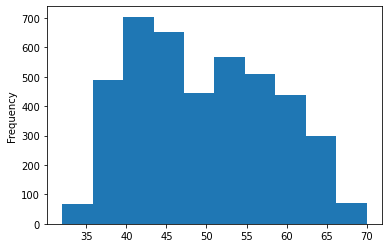

In [ ]:
data["age"].plot.hist()

# Drop columns

In [ ]:
remove = ['education']
data.drop(remove, inplace =True, axis =1)

In [ ]:
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Eksik dğerleri mean ile doldurma

In [ ]:
data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

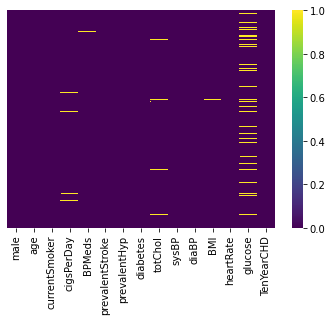

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
data["cigsPerDay"]= imputer.fit_transform(data[["cigsPerDay"]])



In [ ]:
imputer = SimpleImputer(strategy="mean")
data["BPMeds"]= imputer.fit_transform(data[["BPMeds"]])

In [ ]:
imputer = SimpleImputer(strategy="mean")

data["totChol"]= imputer.fit_transform(data[["totChol"]])
data["heartRate"]= imputer.fit_transform(data[["heartRate"]])
data["BMI"]= imputer.fit_transform(data[["BMI"]])
data["glucose"]= imputer.fit_transform(data[["glucose"]])

In [ ]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#

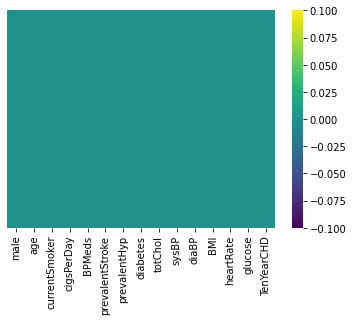

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="viridis")

In [ ]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Split data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y= data["TenYearCHD"]
x= data.drop("TenYearCHD", axis=1)

x_trian, x_test, y_trian, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()


In [ ]:
x_trian= scaler.fit_transform(x_trian)
x_test= scaler.fit_transform(x_test)

In [ ]:
print(x_test)

[[1.         0.83333333 0.         ... 0.3609589  0.3255814  0.13939394]
 [1.         0.33333333 0.         ... 0.39006849 0.47674419 0.13030303]
 [0.         0.5        1.         ... 0.125      0.36046512 0.16969697]
 ...
 [1.         0.47222222 0.         ... 0.36678082 0.47674419 0.14242424]
 [1.         0.86111111 0.         ... 0.28458904 0.59302326 1.        ]
 [1.         0.61111111 1.         ... 0.2619863  0.36046512 0.0969697 ]]


In [ ]:
y_trian.value_counts()

0    2870
1     520
Name: TenYearCHD, dtype: int64

In [ ]:
y_trian.shape

(3390,)

# LogisticRegression Model


In [ ]:
clf= LogisticRegression(random_state=0, max_iter=1000).fit(x_trian,y_trian)

In [ ]:
predictions =clf.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.8514150943396226


# confusion matrix

In [ ]:
predict=clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=["Predicted No", "Predicted Yes"], index=["Actual No","Actual Yes"])

,Predicted No,Predicted Yes
Actual No,711,13
Actual Yes,113,11


In [ ]:
predict_df = pd.DataFrame(predict,columns=["predict"])



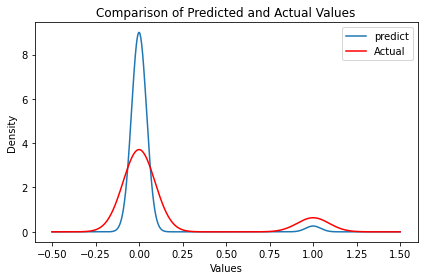

In [ ]:
fig, ax = plt.subplots()

predict_df.plot(kind='kde', ax=ax, label='Predicted')
y_test.plot(kind='kde', ax=ax, color='red', label='Actual')

ax.legend(loc='best')
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.set_title('Comparison of Predicted and Actual Values')

plt.tight_layout()
plt.show()